# Experiment 3
Unbalanced Dataset Techniques

In [1]:
# solve the `ImportError: attempted relative import with no known parent package` error when making relative importings inside a jupyter notebook
import sys
import os

current_dir = os.path.dirname(os.path.abspath("__file__")) #this variable returns the current path
parent_dir = os.path.dirname(os.path.dirname(current_dir)) # this variable returns the path /efc/
sys.path.append(parent_dir)

In [2]:
import pandas as pd

In [3]:
from results.common.constants import METRICS_COLUMNS, SIZES_COLUMNS, LABELS_CM

In [4]:
from unbalanced_techniques import efc_baseline, equally_distributing_correlating, smote, random_resampling

In [5]:
FIG_NAME = "{figure}"

In [6]:
LABELS_CM.append("Technique")

## Baseline: Unsupervised Elliptic Data Set With EFC

In [ ]:
sizes_1, metric_dict_1, confusion_matrix_1 = efc_baseline(
    technique="Unbalanced Dataset",
    fig_folder=FIG_FOLDER.format(technique='1_unbalaced_dataset_efc_baseline'),
    fig_name=FIG_NAME.format(figure='1_unbalanced_dataset')
)

In [ ]:
df_sizes = pd.DataFrame(data=sizes_1, columns=SIZES_COLUMNS, index=[0])

In [ ]:
df_sizes

In [ ]:
df_efc_metrics = pd.DataFrame(data=metric_dict_1, columns=METRICS_COLUMNS, index=[0])

In [ ]:
df_efc_metrics

In [ ]:
confusion_matrix_1

In [ ]:
df_efc_confusion_matrix = pd.DataFrame(data=confusion_matrix_1, columns=LABELS_CM, index=[0])

In [ ]:
df_efc_confusion_matrix

## Techniques

### Balanced Dataset (Equally Distributed Classes)

In [ ]:
sizes_2, metric_dict_2, confusion_matrix_2 = equally_distributing_correlating(
    technique="Balanced Dataset (Equally Distributed Classes)",
    fig_folder=FIG_FOLDER.format(technique='2_equally_distributed_classes'),
    fig_name=FIG_NAME.format(figure='2_balaced_dataset')
)

In [ ]:
df_sizes.loc[1] = sizes_2

In [ ]:
df_sizes

In [ ]:
df_efc_metrics.loc[1] = metric_dict_2

In [ ]:
df_efc_metrics

In [ ]:
confusion_matrix_2

In [ ]:
df_efc_confusion_matrix.loc[1] = confusion_matrix_2

In [ ]:
df_efc_confusion_matrix

### SMOTE

In [ ]:
sizes_3, metric_dict_3, confusion_matrix_3 = smote(
    technique="Smote",
    fig_folder=FIG_FOLDER.format(technique='3_smote_minority'),
    fig_name=FIG_NAME.format(figure='3_smote_minority')
)

In [ ]:
df_sizes.loc[2] = sizes_3

In [ ]:
df_sizes

In [ ]:
df_efc_metrics.loc[2] = metric_dict_3

In [ ]:
df_efc_metrics

In [ ]:
df_efc_confusion_matrix.loc[2] = confusion_matrix_3

In [ ]:
df_efc_confusion_matrix

### SMOTE Test With Full Dataset
We train EFC with a "smotted" dataset, the test phase is done with the full elliptic dataset.

/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/efc/results/common/shared_functions.py:101: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_classes.replace({"class": {"1": 1, "2": 0, "unknown": 2}}, inplace=True)
/Users/kevinaraujo/.pyenv/versions/masters/lib/python3.12/site-packages/imblearn/over_sampling/_smote/base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/Users/kevinaraujo/repos/dissertation/PPCA-UnB-Dissertation/models/notebooks/efc/results/common/shared_functions.py:101: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future

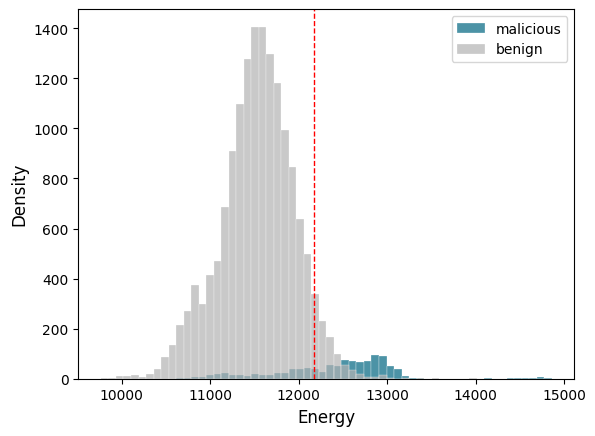

In [7]:
sizes_4, metric_dict_4, confusion_matrix_4 = smote(
    technique="Smote Test With Full Dataset",
    fig_name=FIG_NAME.format(figure='4_smote_minority_full_test_dataset'),
    test_complete_dataset=True
)

In [8]:
df_sizes_1 = pd.DataFrame(data=sizes_4, columns=SIZES_COLUMNS, index=[0])

In [9]:
df_sizes_1

,Technique,X Size,y Size,X_train Size,X_test Size,y_train Size,y_test Size,y_train Malicious Size,y_train Bening Size,y_test Malicious Size,y_test Bening Size
0,Smote Test With Full Dataset,75496,75496,58826,16670,58826,16670,29413,29413,1083,15587


In [10]:
df_efc_metrics = pd.DataFrame(data=metric_dict_4, columns=METRICS_COLUMNS, index=[0])

In [11]:
df_efc_metrics

,Technique,accuracy,f1,f1_micro,f1_macro,precision,recall
0,Smote Test With Full Dataset,0.929514,0.93554,0.929514,0.760397,0.944681,0.929514


In [12]:
df_efc_confusion_matrix = pd.DataFrame(data=confusion_matrix_4, columns=LABELS_CM, index=[0])

In [13]:
df_efc_confusion_matrix

,True Negative,False positive,False Negative,True Positive,Technique
0,745,338,837,14750,Smote Test With Full Dataset


### Random Resampling Imbalanced Datasets

#### Random Oversampling

The random oversampling may increase the likelihood of occurring overfitting, since it makes exact copies of the minority class examples. Let's say every data point from the minority class is copied 6 times before making the splits. If we did a 3-fold validation, each fold has (on average) 2 copies of each point! In this way a classifier might construct rules that are apparently accurate, but actually cover one replicated example.

##### Imbalanced-Learn Pipeline

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

During the cross-validation process we should split into training and validation segments. Then, on each segment, we should:

1.    Oversample the minority class.
2.    Train the classifier on the training segment.
3.    Validate the classifier on the remaining segment.

In [ ]:
sizes_4, metric_dict_4, confusion_matrix_4 = random_resampling(
    technique="Random Oversampling",
    fig_folder=FIG_FOLDER.format(technique='4_random_resampling'),
    fig_name=FIG_NAME.format(figure='4_1_random_oversampling'),
    resampling="RandomOverSampler",
)

In [ ]:
df_sizes.loc[3] = sizes_4

In [ ]:
df_sizes

In [ ]:
df_efc_metrics.loc[3] = metric_dict_4

In [ ]:
df_efc_metrics

In [ ]:
df_efc_confusion_matrix.loc[3] = confusion_matrix_4

In [ ]:
df_efc_confusion_matrix

In [ ]:
sizes_5, metric_dict_5, confusion_matrix_5 = random_resampling(
    technique="Random Undersampling",
    fig_folder=FIG_FOLDER.format(technique='4_random_resampling'),
    fig_name=FIG_NAME.format(figure='4_2_random_undersampling'),
    resampling="RandomUnderSampler",
)

In [ ]:
df_sizes.loc[4] = sizes_5

In [ ]:
df_sizes

In [ ]:
df_efc_metrics.loc[4] = metric_dict_5

In [ ]:
df_efc_metrics

In [ ]:
df_efc_confusion_matrix.loc[4] = confusion_matrix_5

In [ ]:
df_efc_confusion_matrix

### save results to a csv file

In [ ]:
FIG_FOLDER = "results/efc/experiment-x-4"

In [ ]:
file_name = f'{FIG_FOLDER}/df_sizes.csv'

In [ ]:
df_sizes.to_csv(file_name, sep=',', encoding='utf-8', index=False, header=True)

In [ ]:
file_name = f'{FIG_FOLDER}/df_efc_metrics.csv'

In [ ]:
df_efc_metrics.to_csv(file_name, sep=',', encoding='utf-8', index=False, header=True)

In [ ]:
file_name = f'{FIG_FOLDER}/df_efc_confusion_matrix.csv'

In [ ]:
df_efc_confusion_matrix.to_csv(file_name, sep=',', encoding='utf-8', index=False, header=True)